In [5]:
import random
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import sklearn
from sklearn.cross_validation import train_test_split
import pandas as pd
random.seed(1235)
import numpy as np
mnist = mnist.load_data()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the 

#### 1. Load the MNIST dataset
- Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1
- Randomly split the training data into 50,000 training observations and 10,000 validation observations

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist

In [7]:
#transform the sets into tensors

train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255
train_labels = to_categorical(train_labels)

test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255
test_labels = to_categorical(test_labels)

### 3. Implement a series of neural network models
- Initial test
- 5 dense, fully-connected layers
- relu activation except for the last layer (use softmax)
- Initialize with 512 hidden units apiece (except for the last layer)
- Use rmsprop optimizer
- Use categorical crossentropy for loss function
- Track validation set accuracy during training process
- Train with batch_size = 512 and 200 epochs
- Plot the validation set accuracy and loss over the epochs
- Identify the epoch where the model's performance degrades based on the validation set

In [8]:
network = models.Sequential()

network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ))) 
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ))) 
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ))) 
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ))) 
network.add(layers.Dense(10, activation = "softmax"))

network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
               )

network_training_1 = network.fit(train_images,
                                 train_labels, 
                                 epochs = 200,
                                 validation_split = 10000/len(train_images),
                                 batch_size = 512,
                                 verbose = 1)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 35us/step - loss: 0.5083 - acc: 0.8341 - val_loss: 0.1547 - val_acc: 0.9550
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.1595 - acc: 0.9521 - val_loss: 0.1112 - val_acc: 0.9673
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0972 - acc: 0.9701 - val_loss: 0.1191 - val_acc: 0.9666
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0652 - acc: 0.9806 - val_loss: 0.0993 - val_acc: 0.9728
Epoch 5/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0514 - acc: 0.9849 - val_loss: 0.0787 - val_acc: 0.9785
Epoch 6/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0378 - acc: 0.9890 - val_loss: 0.0829 - val_acc: 0.9789
Epoch 7/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0291 - acc: 0.9914 - val_loss: 0.1199 - 

50000/50000 [==============================] - 1s 15us/step - loss: 0.0063 - acc: 0.9986 - val_loss: 0.1390 - val_acc: 0.9831
Epoch 60/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0064 - acc: 0.9990 - val_loss: 0.1763 - val_acc: 0.9810
Epoch 61/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0050 - acc: 0.9989 - val_loss: 0.1591 - val_acc: 0.9831
Epoch 62/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0064 - acc: 0.9988 - val_loss: 0.1843 - val_acc: 0.9815
Epoch 63/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0049 - acc: 0.9991 - val_loss: 0.1645 - val_acc: 0.9827
Epoch 64/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.2345 - val_acc: 0.9793
Epoch 65/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0068 - acc: 0.9989 - val_loss: 0.1761 - val_acc: 0.9817
Epoch 66/200
50000/50000 [==============

Epoch 118/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0075 - acc: 0.9990 - val_loss: 0.1855 - val_acc: 0.9829
Epoch 119/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0055 - acc: 0.9995 - val_loss: 0.2261 - val_acc: 0.9823
Epoch 120/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0092 - acc: 0.9990 - val_loss: 0.1790 - val_acc: 0.9826
Epoch 121/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.2003 - val_acc: 0.9826
Epoch 122/200
50000/50000 [==============================] - 1s 15us/step - loss: 4.4862e-04 - acc: 0.9999 - val_loss: 0.2259 - val_acc: 0.9826
Epoch 123/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0112 - acc: 0.9988 - val_loss: 0.2059 - val_acc: 0.9827
Epoch 124/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0096 - acc: 0.9990 - val_loss: 0.1989 - val_acc: 0.9824
Epoch 125/200
50

50000/50000 [==============================] - 1s 15us/step - loss: 0.0028 - acc: 0.9997 - val_loss: 0.2194 - val_acc: 0.9811
Epoch 177/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0063 - acc: 0.9993 - val_loss: 0.2447 - val_acc: 0.9787
Epoch 178/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0090 - acc: 0.9992 - val_loss: 0.2182 - val_acc: 0.9810
Epoch 179/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0065 - acc: 0.9993 - val_loss: 0.2251 - val_acc: 0.9811
Epoch 180/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0087 - acc: 0.9991 - val_loss: 0.2004 - val_acc: 0.9824
Epoch 181/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0091 - acc: 0.9991 - val_loss: 0.1985 - val_acc: 0.9829
Epoch 182/200
50000/50000 [==============================] - 1s 15us/step - loss: 0.0077 - acc: 0.9991 - val_loss: 0.2004 - val_acc: 0.9831
Epoch 183/200
50000/50000 [=======

- Plot the validation set accuracy and loss over the epochs
- Identify the epoch where the model's performance degrades based on the validation set

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

network1_results = pd.DataFrame(network_training_1.history).reset_index().rename(columns = {"index":"epoch"})

accuracy = network1_results['val_acc']
loss = network1_results['val_loss']



Text(0.5,1,'Validation Accuracy and Loss by Epoch')

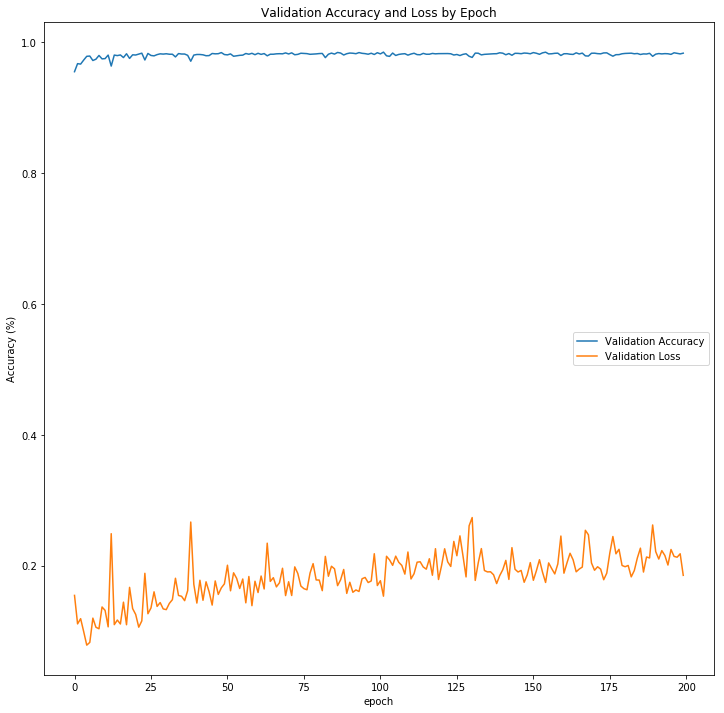

In [10]:
#network1_results.plot(network1_results.index, accuracy)
plt.figure(figsize=(12,12))
plt.plot(network1_results.epoch, accuracy, label = "Validation Accuracy")
plt.plot(network1_results.epoch, loss, label = "Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Accuracy (%)")
plt.legend(loc='right')
plt.title("Validation Accuracy and Loss by Epoch")

In [11]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.2228264885936048
Test Accuracy:  0.9791


***

### 2.2 Implement dropout
- Implement layer dropout after each layer from model 1 (except the last)
- Use a dropout rate of 0.5
- Estimate the model, and graphically compare the validation loss across epochs to the initial model. How does this new model perform relative to the old model?

In [12]:
network2 = models.Sequential()

network2.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network2.add(layers.Dropout(.5))
network2.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network2.add(layers.Dropout(.5))
network2.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network2.add(layers.Dropout(.5))
network2.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ))) 
network2.add(layers.Dropout(.5))
network2.add(layers.Dense(10, activation = "softmax"))

network2.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
               )

network2_dropout = network2.fit(train_images,
                                 train_labels, 
                                 epochs = 200,
                                 validation_split = 10000/len(train_images),
                                 batch_size = 512,
                                 verbose = 0)

test_loss_droupout, test_acc_droupout = network2.evaluate(test_images, test_labels)


10000/10000 [==============================] - 0s 48us/step


In [13]:
print("Test Loss: ", test_loss_droupout)
print("Test Accuracy: ", test_acc_droupout)

Test Loss:  0.16824880326461286
Test Accuracy:  0.983


In [14]:
network2_results = pd.DataFrame(network2_dropout.history).reset_index().rename(columns = {"index":"epoch"})
dropout_accuracy =network2_results['val_acc']
dropout_loss = network2_results['val_loss']

Text(0.5,1,'Validation Accuracy and Loss by Epoch')

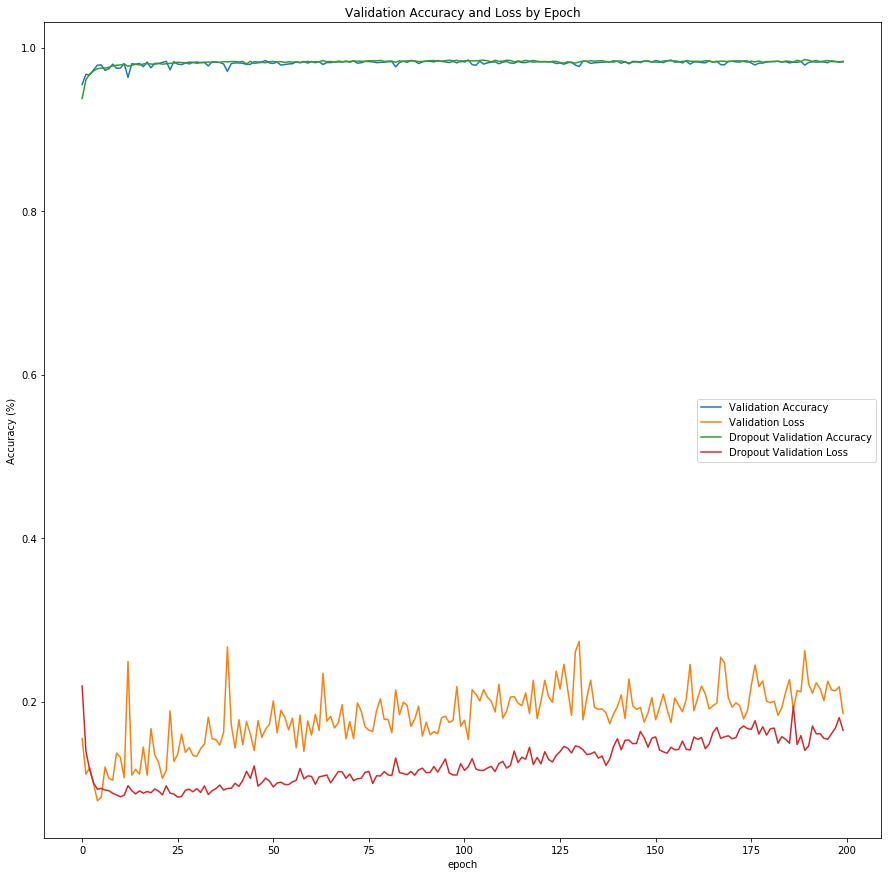

In [15]:
#network1_results.plot(network1_results.index, accuracy)
%matplotlib inline
plt.figure(figsize=(15,15))
plt.plot(network1_results.epoch, accuracy, label = "Validation Accuracy")
plt.plot(network1_results.epoch, loss, label = "Validation Loss")
plt.plot(network2_results.epoch, dropout_accuracy, label = "Dropout Validation Accuracy")
plt.plot(network2_results.epoch, dropout_loss, label = "Dropout Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Accuracy (%)")
plt.legend(loc='right')
plt.title("Validation Accuracy and Loss by Epoch")

Compared to the baseline model, the dropout model appears to be performing better because it has a high validation accuracy as well as a low validation loss score across 200 epochs

***

### 2.3 Weight regularization
- Reestimate the initial model with L1 weight regularization on each layer (except the final layer) with a 0.001 penalty for each weight coefficient
- Reestimate the initial model with L2 weight regularization on each layer (except the final layer) with a 0.001 penalty for each weight coefficient
- Plot the validation loss for the initial model vs. the dropout vs. the L1 regularized model vs. the L2 regularized model - which model appears to perform the best?

In [16]:
from keras import regularizers

network3 = models.Sequential()

network3.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l1(0.001)))
network3.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l1(0.001)))
network3.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l1(0.001)))
network3.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l1(0.001))) 
network3.add(layers.Dense(10, activation = "softmax"))

network3.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
               )

network3_l1 = network3.fit(train_images,
                                 train_labels, 
                                 epochs = 200,
                                 validation_split = 10000/len(train_images),
                                 batch_size = 512,
                                 verbose = 1)

test_loss_l1, test_acc_l1 = network3.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 24us/step - loss: 13.7214 - acc: 0.6485 - val_loss: 3.9356 - val_acc: 0.7785
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 3.0506 - acc: 0.7829 - val_loss: 2.5457 - val_acc: 0.7717
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 2.2158 - acc: 0.8288 - val_loss: 1.9583 - val_acc: 0.8708
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.8902 - acc: 0.8552 - val_loss: 1.7752 - val_acc: 0.8605
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.7092 - acc: 0.8702 - val_loss: 1.5891 - val_acc: 0.8954
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.5870 - acc: 0.8834 - val_loss: 1.5385 - val_acc: 0.8917
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 1.4984 - acc: 0.8919 - val_loss: 1.4404 -

50000/50000 [==============================] - 1s 16us/step - loss: 0.9528 - acc: 0.9526 - val_loss: 0.9323 - val_acc: 0.9618
Epoch 60/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9483 - acc: 0.9540 - val_loss: 0.9739 - val_acc: 0.9483
Epoch 61/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9503 - acc: 0.9538 - val_loss: 0.9860 - val_acc: 0.9437
Epoch 62/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9502 - acc: 0.9524 - val_loss: 0.9331 - val_acc: 0.9592
Epoch 63/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9449 - acc: 0.9531 - val_loss: 0.9556 - val_acc: 0.9550
Epoch 64/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9420 - acc: 0.9538 - val_loss: 0.9348 - val_acc: 0.9581
Epoch 65/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9447 - acc: 0.9535 - val_loss: 0.9449 - val_acc: 0.9569
Epoch 66/200
50000/50000 [==============

Epoch 118/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.9025 - acc: 0.9575 - val_loss: 0.9518 - val_acc: 0.9420
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9028 - acc: 0.9568 - val_loss: 0.9026 - val_acc: 0.9577
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9018 - acc: 0.9569 - val_loss: 0.9091 - val_acc: 0.9563
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9000 - acc: 0.9574 - val_loss: 0.8979 - val_acc: 0.9603
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9043 - acc: 0.9554 - val_loss: 0.9179 - val_acc: 0.9555
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9018 - acc: 0.9564 - val_loss: 0.9131 - val_acc: 0.9547
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.9019 - acc: 0.9570 - val_loss: 0.9062 - val_acc: 0.9577
Epoch 125/200
50000/

50000/50000 [==============================] - 1s 16us/step - loss: 0.8839 - acc: 0.9585 - val_loss: 0.9356 - val_acc: 0.9410
Epoch 177/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8857 - acc: 0.9581 - val_loss: 0.8905 - val_acc: 0.9576
Epoch 178/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8843 - acc: 0.9587 - val_loss: 0.8893 - val_acc: 0.9578
Epoch 179/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8828 - acc: 0.9588 - val_loss: 0.9143 - val_acc: 0.9527
Epoch 180/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8840 - acc: 0.9579 - val_loss: 0.9061 - val_acc: 0.9553
Epoch 181/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8835 - acc: 0.9585 - val_loss: 0.9334 - val_acc: 0.9426
Epoch 182/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8798 - acc: 0.9603 - val_loss: 0.8964 - val_acc: 0.9559
Epoch 183/200
50000/50000 [=======

In [17]:
print("Test Loss: ", test_loss_l1)
print("Test Accuracy: ", test_acc_l1)

Test Loss:  0.8756045085906983
Test Accuracy:  0.9602


In [18]:
network4 = models.Sequential()

network4.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001)))
network4.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001)))
network4.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001)))
network4.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001))) 
network4.add(layers.Dense(10, activation = "softmax"))

network4.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
               )

network4_l2 = network4.fit(train_images,
                                 train_labels, 
                                 epochs = 200,
                                 validation_split = 10000/len(train_images),
                                 batch_size = 512,
                                 verbose = 1)

test_loss_l2, test_acc_l2 = network4.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 1s 25us/step - loss: 1.7982 - acc: 0.8210 - val_loss: 1.1794 - val_acc: 0.8859
Epoch 2/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.8337 - acc: 0.9347 - val_loss: 0.7429 - val_acc: 0.9209
Epoch 3/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.5354 - acc: 0.9526 - val_loss: 0.4470 - val_acc: 0.9580
Epoch 4/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.4070 - acc: 0.9587 - val_loss: 0.3298 - val_acc: 0.9735
Epoch 5/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.3339 - acc: 0.9647 - val_loss: 0.2969 - val_acc: 0.9723
Epoch 6/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.2835 - acc: 0.9703 - val_loss: 0.2775 - val_acc: 0.9678
Epoch 7/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.2580 - acc: 0.9713 - val_loss: 0.2309 - 

50000/50000 [==============================] - 1s 16us/step - loss: 0.0968 - acc: 0.9906 - val_loss: 0.1476 - val_acc: 0.9766
Epoch 60/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0976 - acc: 0.9900 - val_loss: 0.1397 - val_acc: 0.9779
Epoch 61/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0962 - acc: 0.9907 - val_loss: 0.1388 - val_acc: 0.9784
Epoch 62/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0944 - acc: 0.9910 - val_loss: 0.1670 - val_acc: 0.9711
Epoch 63/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0959 - acc: 0.9902 - val_loss: 0.1278 - val_acc: 0.9821
Epoch 64/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0949 - acc: 0.9907 - val_loss: 0.1388 - val_acc: 0.9787
Epoch 65/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0931 - acc: 0.9912 - val_loss: 0.1431 - val_acc: 0.9771
Epoch 66/200
50000/50000 [==============

Epoch 118/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0832 - acc: 0.9922 - val_loss: 0.1252 - val_acc: 0.9802
Epoch 119/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0835 - acc: 0.9912 - val_loss: 0.1341 - val_acc: 0.9795
Epoch 120/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0855 - acc: 0.9913 - val_loss: 0.1716 - val_acc: 0.9696
Epoch 121/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0844 - acc: 0.9917 - val_loss: 0.1702 - val_acc: 0.9709
Epoch 122/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0819 - acc: 0.9919 - val_loss: 0.1274 - val_acc: 0.9800
Epoch 123/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0830 - acc: 0.9920 - val_loss: 0.1352 - val_acc: 0.9775
Epoch 124/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0810 - acc: 0.9923 - val_loss: 0.1370 - val_acc: 0.9772
Epoch 125/200
50000/

50000/50000 [==============================] - 1s 16us/step - loss: 0.0770 - acc: 0.9923 - val_loss: 0.3355 - val_acc: 0.9306
Epoch 177/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0762 - acc: 0.9932 - val_loss: 0.2396 - val_acc: 0.9472
Epoch 178/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0758 - acc: 0.9930 - val_loss: 0.1423 - val_acc: 0.9755
Epoch 179/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0820 - acc: 0.9910 - val_loss: 0.1216 - val_acc: 0.9812
Epoch 180/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0761 - acc: 0.9932 - val_loss: 0.1335 - val_acc: 0.9777
Epoch 181/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0804 - acc: 0.9917 - val_loss: 0.1248 - val_acc: 0.9791
Epoch 182/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0764 - acc: 0.9922 - val_loss: 0.1268 - val_acc: 0.9771
Epoch 183/200
50000/50000 [=======

In [19]:
print("Test Loss: ", test_loss_l2)
print("Test Accuracy: ", test_acc_l2)

Test Loss:  0.15360268701910973
Test Accuracy:  0.9742


In [20]:
network3_results = pd.DataFrame(network3_l1.history).reset_index().rename(columns = {"index":"epoch"})
l1_acc =network3_results['val_acc']
l1_loss = network3_results['val_loss']

network4_results = pd.DataFrame(network4_l2.history).reset_index().rename(columns = {"index":"epoch"})
l2_acc =network4_results['val_acc']
l2_loss = network4_results['val_loss']

Text(0.5,1,'Validation Accuracy and Loss by Epoch')

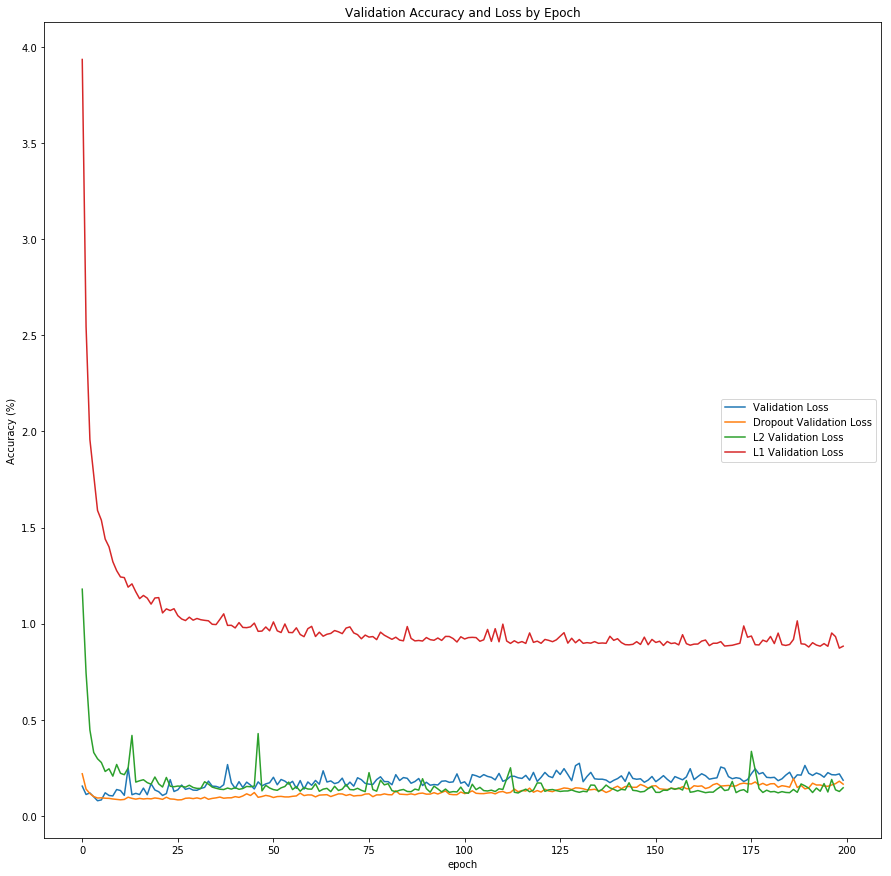

In [21]:
plt.figure(figsize=(15,15))
plt.plot(network1_results.epoch, loss, label = "Validation Loss")
plt.plot(network2_results.epoch, dropout_loss, label = "Dropout Validation Loss")
plt.plot(network4_results.epoch, l2_loss, label = "L2 Validation Loss")
plt.plot(network3_results.epoch, l1_loss, label = "L1 Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Accuracy (%)")
plt.legend(loc='right')
plt.set_ylim([0.0,1.0])
plt.set_xlim([0.0,200])
plt.title("Validation Accuracy and Loss by Epoch")

The L2 regularization model and the Dropout models appear to be the best models becauses they have consistently low validation loss scores across the 200 epochs

### 3.4 Final model
- Select the best model from the ones you have estimated so far - this should have the lowest validation loss score at any potential epoch
- Reestimate that model using all of the training data (no validation set) with the same batch size and the number of epochs necessary to achieve the lowest validation loss in the previous step
- Calcuate the test set loss and accuracy. How well does your model perform to the baseline from chapter 2.1 in the book?


In [22]:
models_stats = pd.DataFrame({"Model" : ["Normal","Dropout","L1 Regularization","L2 Regularization"],
                            "Validation Accuracy" : [test_acc, test_acc_droupout, test_acc_l1, test_acc_l2],
                            "Validation Loss" : [test_loss, test_loss_droupout, test_loss_l1, test_loss_l2]
                            })
print(models_stats)

               Model  Validation Accuracy  Validation Loss
0             Normal               0.9791         0.222826
1            Dropout               0.9830         0.168249
2  L1 Regularization               0.9602         0.875605
3  L2 Regularization               0.9742         0.153603


Based on the average loss of .14, I will use the L2 Regularization model as the 'best' model.

In [23]:
network_final = models.Sequential()

network_final.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001)))
network_final.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001)))
network_final.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001)))
network_final.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ), kernel_regularizer = regularizers.l2(0.001))) 
network_final.add(layers.Dense(10, activation = "softmax"))

network_final.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
               )

network_final_hist = network_final.fit(train_images,
                                 train_labels, 
                                 epochs = 200,
                                 batch_size = 512,
                                 verbose = 0)

test_loss_final, test_acc_final = network_final.evaluate(test_images, test_labels)


10000/10000 [==============================] - 1s 63us/step


In [24]:
print("Test Loss: ", test_loss_final)
print("Test Accuracy: ", test_acc_final)

Test Loss:  0.16198908632397652
Test Accuracy:  0.9686


In [25]:
network5 = models.Sequential()

network5.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network5.add(layers.Dropout(.5))
network5.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network5.add(layers.Dropout(.5))
network5.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
network5.add(layers.Dropout(.5))
network5.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ))) 
network5.add(layers.Dropout(.5))
network5.add(layers.Dense(10, activation = "softmax"))

network5.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
               )

network5_dropout = network5.fit(train_images,
                                 train_labels, 
                                 epochs = 200,
                                 batch_size = 512,
                                 verbose = 0)

test_loss_network5, test_acc_network5 = network5.evaluate(test_images, test_labels)
print("Test Loss: ", test_loss_network5)
print("Test Accuracy: ", test_acc_network5)

10000/10000 [==============================] - 1s 61us/step
Test Loss:  0.19173496046465618
Test Accuracy:  0.9826


In [26]:
#baseline model from book

baseline_network = models.Sequential()

baseline_network.add(layers.Dense(412, activation = 'relu', input_shape = (28*28,)))
baseline_network.add(layers.Dense(10, activation = 'softmax'))

baseline_network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy']
               )


baseline_network_hist = baseline_network.fit(train_images,
                                 train_labels, 
                                 epochs = 5,
                                 batch_size = 128,
                                 verbose = 0)

baseline_test_loss, baseline_test_acc = baseline_network.evaluate(test_images, test_labels)
print("Test Loss Baseline ", baseline_test_loss)
print("Test Accuracy Baseline: ", baseline_test_acc)

10000/10000 [==============================] - 1s 53us/step
Test Loss Baseline  0.06846283007995226
Test Accuracy Baseline:  0.9797


Compared to the baseline model from 2.1 in the book, the L2 model performed worse. It had a slightly lower test accuracy and a significantly higher test loss compared to the baseline

***

## Part 2: Scalar regression

- Use the Boston housing dataset from chapter 3.6 to predict median housing markets using a deep learning model
- Use 10-fold cross validation to monitor validation set performance

- At the end of your notebook, report the test set MSE based on your final model trained using all of the training data
Scoring
    - 3 points for proof of model testing (maintain a notebook with a history of your tests of different models)
    - Remaining 2 points awarded based on relative performance within the class as measured by test set MSE
        - 2 points - 1-5 place
        - 1.5 points - 6-15 place
        - 1 point - 16-30 place
        - 0.5 points - 31-40 place


In [33]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [34]:
#normalizing the data:

mean = train_data.mean(axis = 0)

train_data -= mean

std = train_data.std(axis=0)

train_data /= std

test_data -= mean

test_data/=std

In [146]:

#Cross Validation scheme

def kfold_cv(func, k = 4, epochs = 10, batch = 1):
    all_mae_histories = []
    all_mse_histories = []
    num_val_samples = len(train_data)//k
    
    
    for i in range(0,k):
        print('processing fold #', i)
        
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
        
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        
        partial_train_data = np.concatenate(                                     
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
             train_targets[(i + 1) * num_val_samples:]],
            axis=0)

        model = func()                                                    
       
        history = model.fit(partial_train_data, 
                            partial_train_targets,           
                            validation_data=(val_data, val_targets),
                            epochs=epochs, 
                            batch_size=batch, 
                            verbose=0)
        
        mae_history = history.history['val_mean_absolute_error']
        all_mae_histories.append(mae_history)
       
        mse_history = history.history['val_loss']
        all_mse_histories.append(mse_history)
        
    return(all_mae_histories, 
               all_mse_histories, 
               test_data,
               test_targets,
               model, 
               history)


In [158]:
#Produces the MAE plot for each model
def mae_plot(mses, epochs):
    avg_mae = [np.mean([x[i] for x in mses]) for i in range(epochs)]
    plt.figure(figsize = (10,10))
    plt.plot(range(1, len(avg_mae) + 1), avg_mae)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MSE')
    plt.show()

In [159]:
#prints the MSE and MAE for each Model
def model_metrics(test_data, test_targets, model):
    mse, mae = model.evaluate(test_data, test_targets)
    print("MSE For Test Set: ", mse)
    print("MAE For Test Set: ", mae)

In [160]:
#function that passes in the data to all the other functions
def q3(model, k=10, epochs = 10, batch = 1):
    mae_scores, mse_scores, test_data, test_targets, model_train, model_history = kfold_cv(model, k, epochs, batch)
    mae_plot(mse_scores, epochs)
    model_metrics(test_data, test_targets, model_train)
    return(mae_scores, mse_scores)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


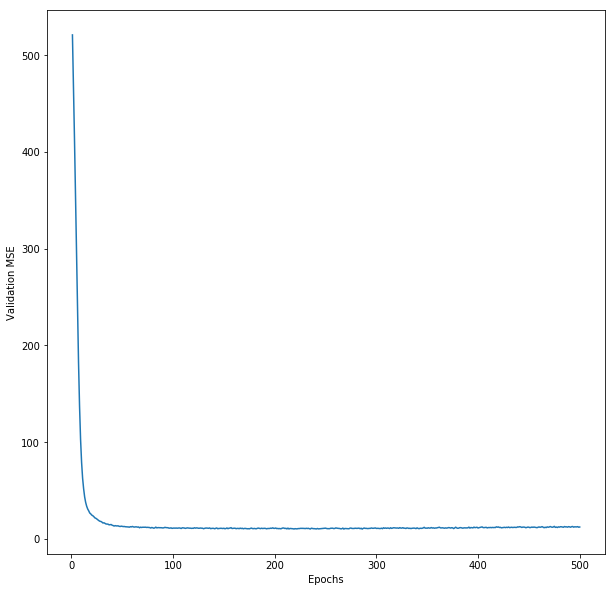

102/102 [==============================] - 0s 119us/step
MSE For Test Set:  15.513727075913373
MAE For Test Set:  2.4462308229184617


In [195]:
#Base line model (from book)

'''
Book as K = 4, epochs = 80 and batch = 16 but I am going to change this to control for changes in different models

'''
K = 10
epochs = 500
batch = 50

def baseline():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


baseline_mae, baseline_mses = q3(baseline, K, epochs, batch)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


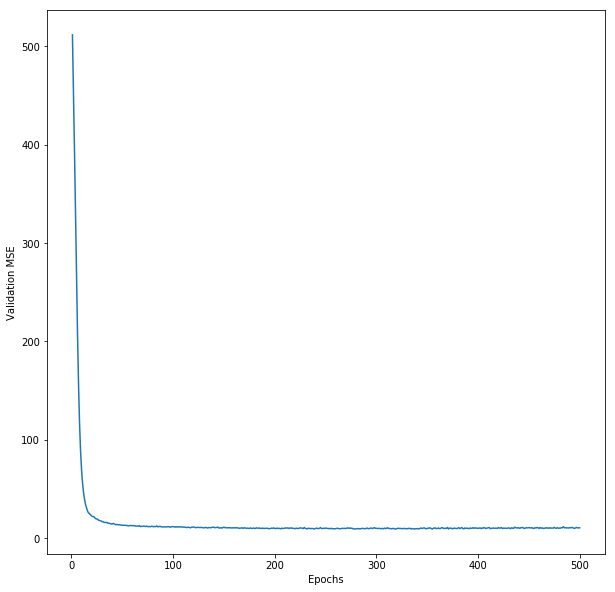

102/102 [==============================] - 0s 166us/step
MSE For Test Set:  13.741024391323913
MAE For Test Set:  2.4084795503055347


In [171]:
#Model 2
'''
Changing:

First layer input to 100
K = 10 (as instructed)

changing model to dropout layer

changing batch size to 50

'''
K = 10
epochs = 500
batch = 50
def model2():
    model = models.Sequential()
    
    model.add(layers.Dense(100, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(.5))
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(.5))

    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

model2_mae, model2_mses = q3(baseline, K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


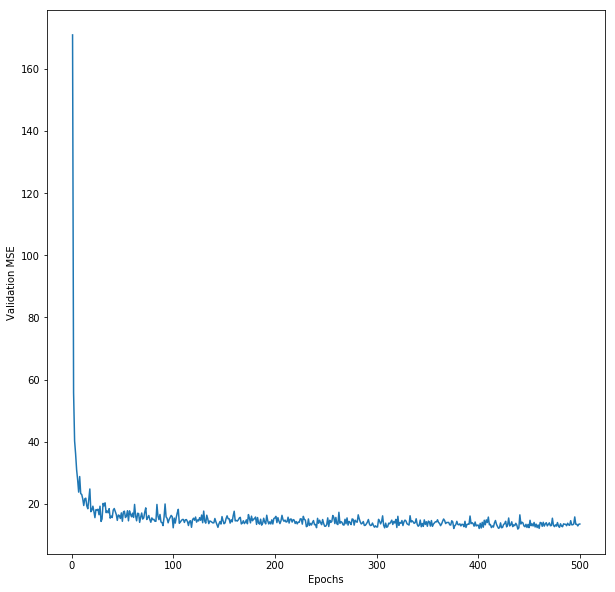

102/102 [==============================] - 0s 139us/step
MSE For Test Set:  16.540277817670038
MAE For Test Set:  2.988354720321356


In [286]:
#Model 3
'''
Changing:

adding more layers w/o dropout, keeping k, epochs and batch the same

K = 10
epochs = 200
batch = 150

'''
K = 10
epochs = 500
batch = 50

def model3():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model3_mae, model3_mses = q3(model4,K,epochs, batch)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


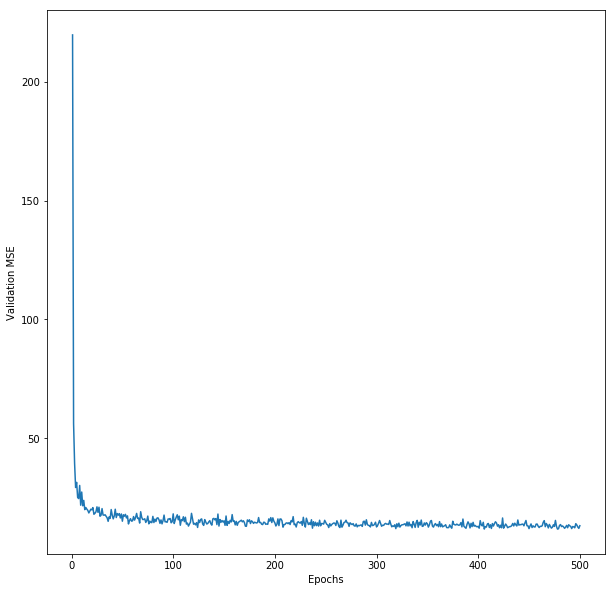

102/102 [==============================] - 0s 156us/step
MSE For Test Set:  13.374305276309743
MAE For Test Set:  2.563291026096718


In [287]:
#Model 4
'''
Changing:

returning to base model but changing to l1 penalization
K = 10
epochs = 200
batch = 150

kernel_regularizer = regularizers.l1(0.001)
'''
K = 10
epochs = 500
batch = 50

def model5():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],),
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model4_mae, model4_mses = q3(model4,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


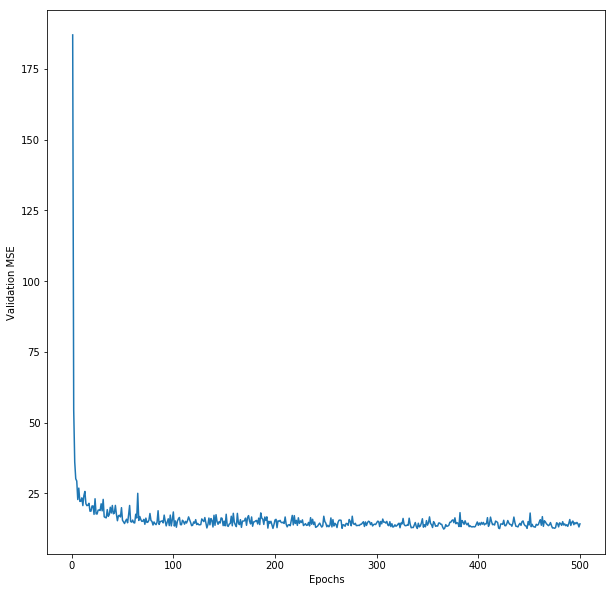

102/102 [==============================] - 0s 154us/step
MSE For Test Set:  13.47202704934513
MAE For Test Set:  2.580424710816028


In [288]:
#Model 5
'''
Changing:

returning to base model but changing to l2 penalization

kernel_regularizer = regularizers.l2(0.001)
'''
K = 10
epochs = 500
batch = 50

def model5():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],),
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model5_mae, model5_mses = q3(model4,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


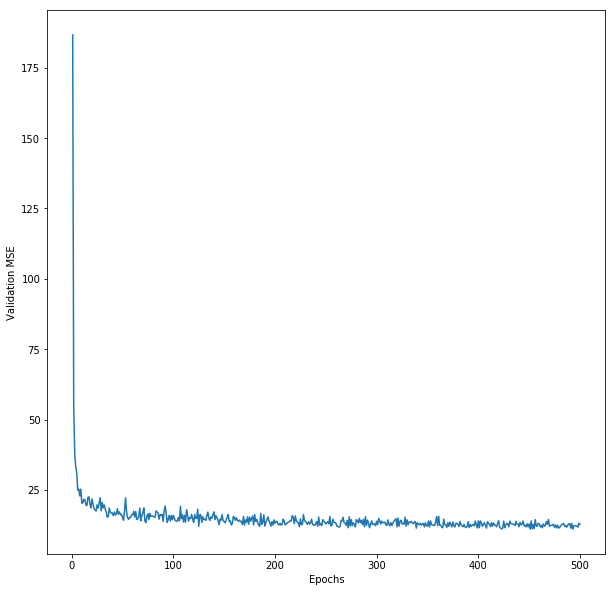

102/102 [==============================] - 0s 135us/step
MSE For Test Set:  21.9015838024663
MAE For Test Set:  3.4636033095565497


In [289]:
#Model 6
'''
Changing:

since model 3 had some good performance, I am going to add a l2 penalization
since model 5 worked well


'''
K = 10
epochs = 500
batch = 50

def model6():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu', input_shape=(train_data.shape[1],),kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(150, activation='relu',kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(100, activation='relu',kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(50, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model6_mae, model6_mses = q3(model4,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


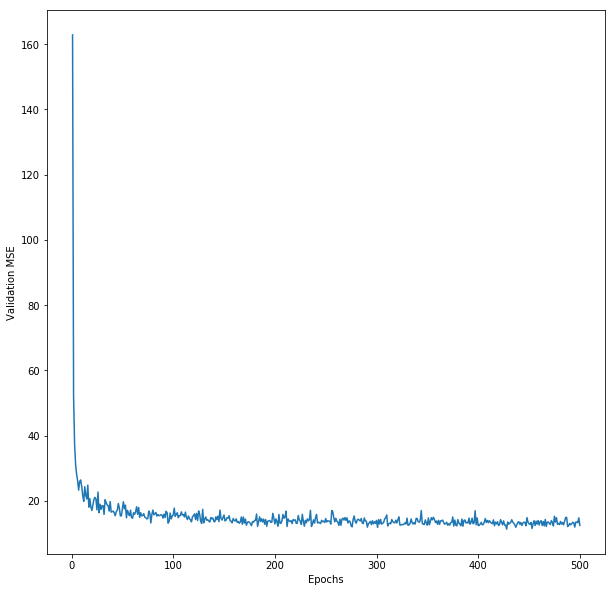

102/102 [==============================] - 0s 153us/step
MSE For Test Set:  12.90797701068953
MAE For Test Set:  2.456830160290587


In [290]:
#Model 7
'''
Changing:

Seeing if anything changes with l1 penalization


'''
K = 10
epochs = 500
batch = 50

def model7():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu', input_shape=(train_data.shape[1],),kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(150, activation='relu',kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(100, activation='relu',kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(50, activation='relu', kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model7_mae, model7_mses = q3(model4,K,epochs, batch)

In [291]:
model_evaluation = pd.DataFrame({
    "baseline_mses":[np.mean([x[i] for x in baseline_mses]) for i in range(epochs)],
    "baseline_mae":[np.mean([x[i] for x in baseline_mae]) for i in range(epochs)],
    "model2_mses":[np.mean([x[i] for x in model2_mses]) for i in range(epochs)],
    "model2_mae":[np.mean([x[i] for x in model2_mae]) for i in range(epochs)],
    "model3_mses":[np.mean([x[i] for x in model3_mses]) for i in range(epochs)],
    "model3_mae":[np.mean([x[i] for x in model3_mae]) for i in range(epochs)],
    "model4_mses":[np.mean([x[i] for x in model4_mses]) for i in range(epochs)],
    "model4_mae":[np.mean([x[i] for x in model4_mae]) for i in range(epochs)],
    "model5_mses":[np.mean([x[i] for x in model5_mses]) for i in range(epochs)],
    "model5_mae":[np.mean([x[i] for x in model5_mae]) for i in range(epochs)],
    "model6_mses":[np.mean([x[i] for x in model6_mses]) for i in range(epochs)],
    "model6_mae":[np.mean([x[i] for x in model6_mae]) for i in range(epochs)],
    "model7_mses":[np.mean([x[i] for x in model7_mses]) for i in range(epochs)],
    "model7_mae":[np.mean([x[i] for x in model7_mae]) for i in range(epochs)],
}).reset_index().rename(columns={"index":"epoch"})



Text(0.5,1,'MSE by Epoch')

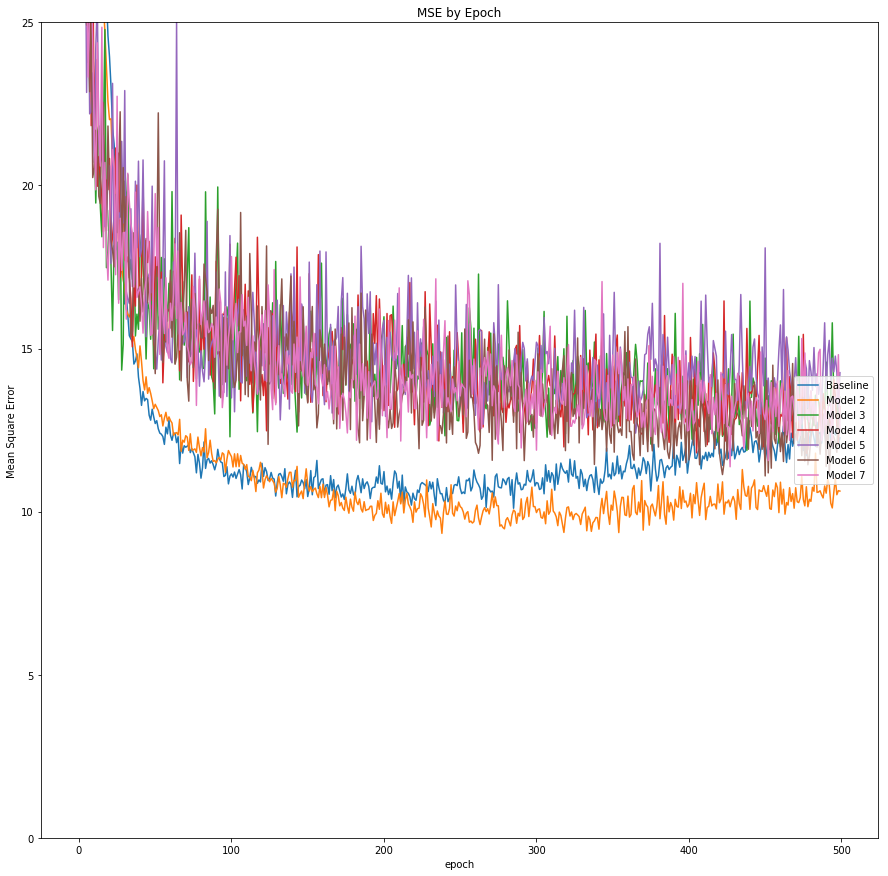

In [292]:
plt.figure(figsize=(15,15))
plt.plot(model_evaluation.epoch, model_evaluation.baseline_mses, label = "Baseline")
plt.plot(model_evaluation.epoch, model_evaluation.model2_mses, label = "Model 2")
plt.plot(model_evaluation.epoch, model_evaluation.model3_mses, label = "Model 3")
plt.plot(model_evaluation.epoch, model_evaluation.model4_mses, label = "Model 4")
plt.plot(model_evaluation.epoch, model_evaluation.model5_mses, label = "Model 5")
plt.plot(model_evaluation.epoch, model_evaluation.model6_mses, label = "Model 6")
plt.plot(model_evaluation.epoch, model_evaluation.model7_mses, label = "Model 7")


plt.ylim([0,25])
plt.xlabel("epoch")
plt.ylabel("Mean Square Error")
plt.legend(loc='right')
plt.title("MSE by Epoch")

Text(0.5,1,'MAE by Epoch')

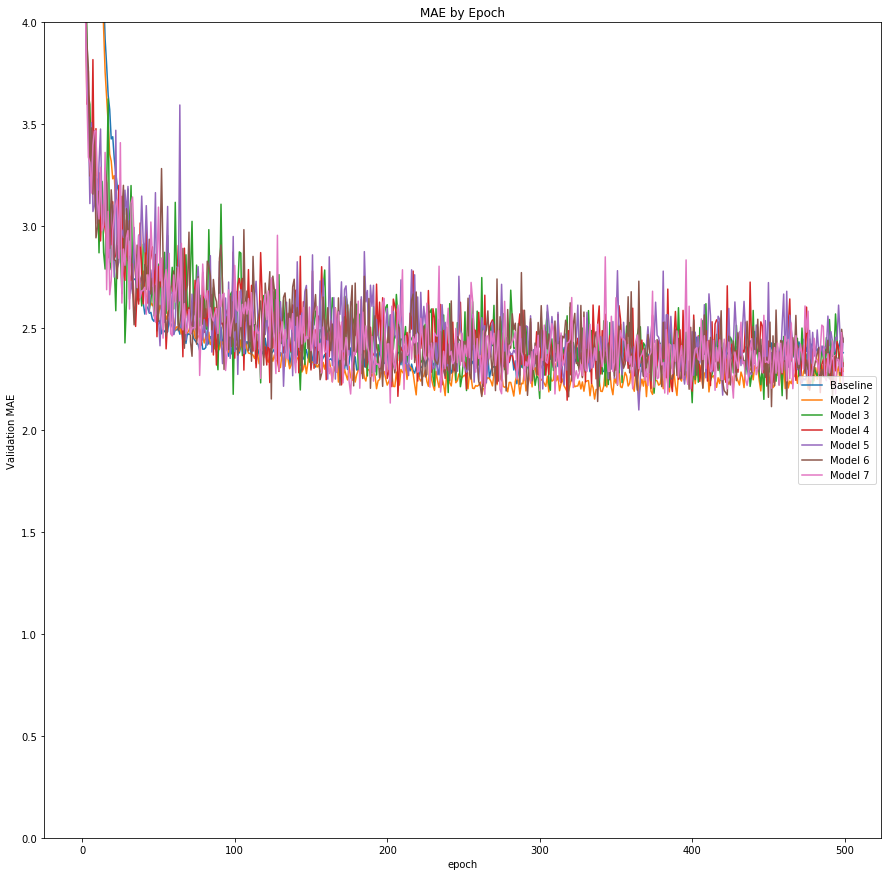

In [293]:
plt.figure(figsize=(15,15))
plt.plot(model_evaluation.epoch, model_evaluation.baseline_mae, label = "Baseline")
plt.plot(model_evaluation.epoch, model_evaluation.model2_mae, label = "Model 2")
plt.plot(model_evaluation.epoch, model_evaluation.model3_mae, label = "Model 3")
plt.plot(model_evaluation.epoch, model_evaluation.model4_mae, label = "Model 4")
plt.plot(model_evaluation.epoch, model_evaluation.model5_mae, label = "Model 5")
plt.plot(model_evaluation.epoch, model_evaluation.model6_mae, label = "Model 6")
plt.plot(model_evaluation.epoch, model_evaluation.model7_mae, label = "Model 7")
plt.xlabel("epoch")
plt.ylim([0,4])
plt.ylabel("Validation MAE")
plt.legend(loc='right')
plt.title("MAE by Epoch")

Since it looks like model 5 has the lowest MSE and MAE we will use that model to predict the outcome

In [311]:
model5 = model6()

model_fit2 =  model5.fit(train_data,
                                 train_targets, 
                                 epochs = 150,
                                 batch_size = 20,
                                 verbose = 0)
model_eval2 = model5.evaluate(test_data, test_targets)
print(model_eval2)

102/102 [==============================] - 4s 36ms/step
[12.603678460214653, 2.372414373884014]


As we can see from the evaluation, model 5 actually performs the best with the lowest mean squared error